In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Persistence Algorithm Steps
A persistence model can be implemented easily in Python. We will break this tutorial down
into 4 steps:
1. Transform the univariate dataset into a supervised learning problem.
2. Establish the train and test datasets for the test harness.
3. Define the persistence model.
4. Make a forecast and establish a baseline performance.
5. Review the complete example and plot the output.

### Step 1: Define the Supervised Learning Problem 

In [9]:
df = pd.read_csv('./dataset/shampoo_sales.csv', usecols=['Sales']).rename(columns={'Sales':'t+1'})
df['t'] = df.shift(1)
df.head()

,t+1,t
0,266.0,NaN
1,145.9,266.0
2,183.1,145.9
3,119.3,183.1
4,180.3,119.3


This snippet creates the dataset and prints the first 5 rows of the new dataset. We can see
that the first row (index 0) will have to be discarded as there was no observation prior to the
first observation to use to make the prediction. From a supervised learning perspective, the t
column is the input variable, or X, and the t+1 column is the output variable, or y.

### Step 2: Train and Test Sets

In [17]:
from sklearn.model_selection import TimeSeriesSplit

X = df.values
splits = TimeSeriesSplit(n_splits=3)
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print(f'train: {len(train)}, test: {len(test)}')

train: 9, test: 9
train: 18, test: 9
train: 27, test: 9


In [23]:
X_train, y_train = train[:,1], train[:, 0]
X_test, y_test = test[:,1], test[:, 0]

### Step 3: Persistence Algorithm

In [18]:
def persistence_model(x):
    return x

### Step 4: Make and Evaluate Forecast

In [26]:
from sklearn.metrics import mean_squared_error
# walk-forward validation
predictions = []
for x in X_test:
    yhat = persistence_model(x)
    predictions.append(yhat)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Test RMSE: {rmse}')

Test RMSE: 148.62196637404878


### Step 5: Complete Example

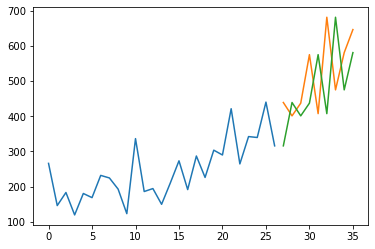

In [28]:
plt.plot(y_train)
plt.plot([None for i in y_train] + [x for x in y_test])
plt.plot([None for i in y_train] + [x for x in predictions])
plt.show()